In [328]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [389]:
dog_bites_df = pd.read_csv('data/Dog_Bites_Data.csv')
akc_df = pd.read_csv('data/akc-data-latest.csv')

In [390]:
# eda part

In [391]:
dog_bites_df.head()

,UniqueID,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode
0,1,January 01 2018,DOG,UNKNOWN,NaN,U,False,Brooklyn,11220
1,2,January 04 2018,DOG,UNKNOWN,NaN,U,False,Brooklyn,NaN
2,3,January 06 2018,DOG,Pit Bull,NaN,U,False,Brooklyn,11224
3,4,January 08 2018,DOG,Mixed/Other,4,M,False,Brooklyn,11231
4,5,January 09 2018,DOG,Pit Bull,NaN,U,False,Brooklyn,11224


In [392]:
dog_bites_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22663 entries, 0 to 22662
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UniqueID    22663 non-null  int64 
 1   DateOfBite  22663 non-null  object
 2   Species     22663 non-null  object
 3   Breed       20445 non-null  object
 4   Age         11442 non-null  object
 5   Gender      22663 non-null  object
 6   SpayNeuter  22663 non-null  bool  
 7   Borough     22663 non-null  object
 8   ZipCode     16805 non-null  object
dtypes: bool(1), int64(1), object(7)
memory usage: 1.4+ MB


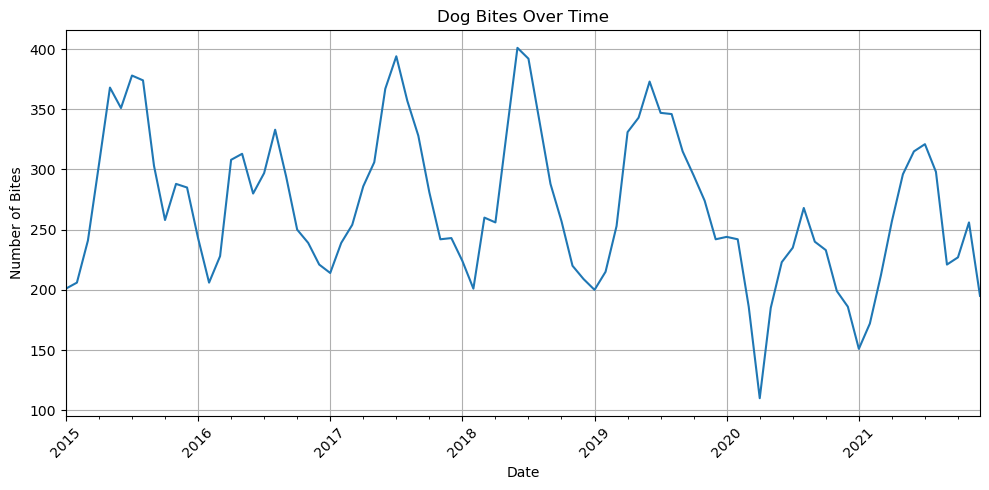

In [393]:
# Convert 'DateOfBite' to datetime format
dog_bites_df['DateOfBite'] = pd.to_datetime(dog_bites_df['DateOfBite'], errors='coerce')

bites_over_time = dog_bites_df.groupby(dog_bites_df['DateOfBite'].dt.to_period('M')).size()

# Line plot for dog bites over time
plt.figure(figsize=(10, 5))
bites_over_time.plot(kind='line')
plt.title('Dog Bites Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Bites')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [394]:
# Define a function to categorize dates into seasons
def get_season(date):
    if date.month in [12, 1, 2]:
        return 'Winter'
    elif date.month in [3, 4, 5]:
        return 'Spring'
    elif date.month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Apply the function to create a 'Season' column
dog_bites_df['Season'] = dog_bites_df['DateOfBite'].apply(get_season)


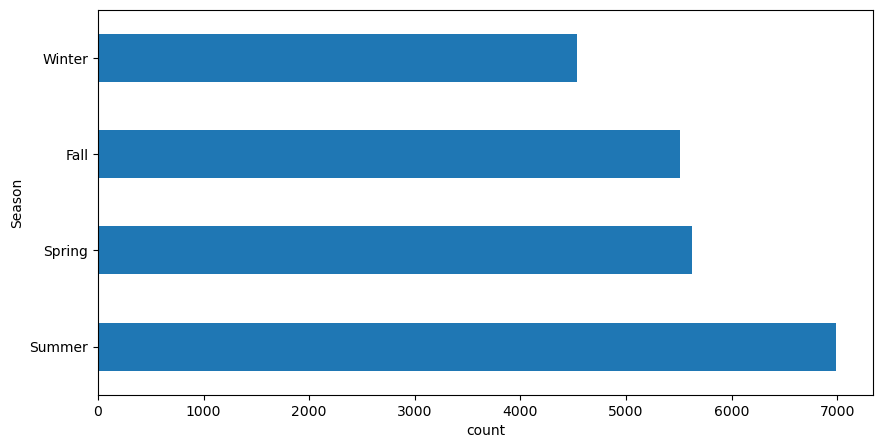

In [395]:
plt.figure(figsize=(10, 5))
dog_bites_df['Season'].value_counts().plot.barh()
plt.xlabel('count')
plt.ylabel('Season')
plt.show()

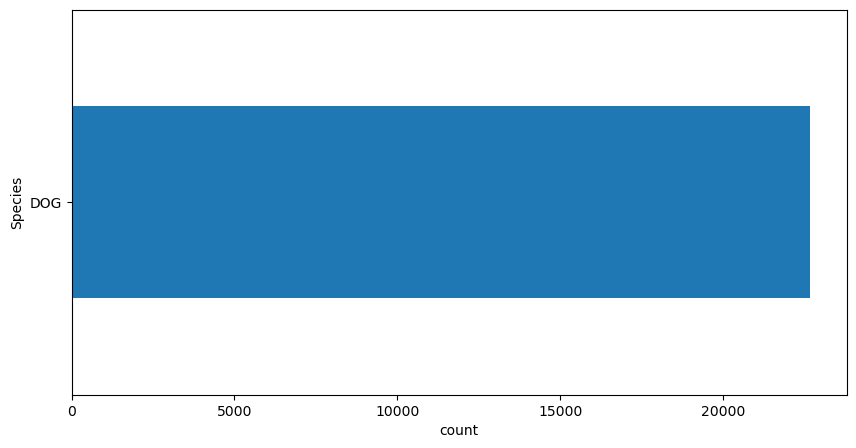

In [396]:
plt.figure(figsize=(10, 5))
dog_bites_df['Species'].value_counts().plot.barh()
plt.xlabel('count')
plt.ylabel('Species')
plt.show()

In [397]:
# Show the number of each distinct category of a specific feature
category_counts = dog_bites_df['Breed'].value_counts()

# Print the result
print(category_counts)

Breed
Pit Bull                 4004
UNKNOWN                  2349
Shih Tzu                  731
Chihuahua                 646
German Shepherd           622
                         ... 
BOXER/ ROTTWEILER MIX       1
MALTESE / SHIH TZU          1
SILKY MIX                   1
JINDO MIX                   1
DUNKER                      1
Name: count, Length: 1651, dtype: int64


In [398]:
# Show the number of each distinct category of a specific feature
category_counts = dog_bites_df['Breed'].value_counts().head(40)

# Print the result
print(category_counts)

Breed
Pit Bull                                4004
UNKNOWN                                 2349
Shih Tzu                                 731
Chihuahua                                646
German Shepherd                          622
Mixed/Other                              559
American Pit Bull Mix / Pit Bull Mix     520
American Pit Bull Terrier/Pit Bull       511
Yorkshire Terrier                        480
MIXED BREED                              388
Maltese                                  371
MIXED                                    351
Rottweiler                               316
Siberian Husky                           303
Labrador Retriever                       282
Poodle, Standard                         264
Bull dog                                 220
Jack Russ                                190
Cocker Spaniel                           172
Labrador Retriever Crossbreed            160
TERRIER                                  158
Beagle                                   142
Gold

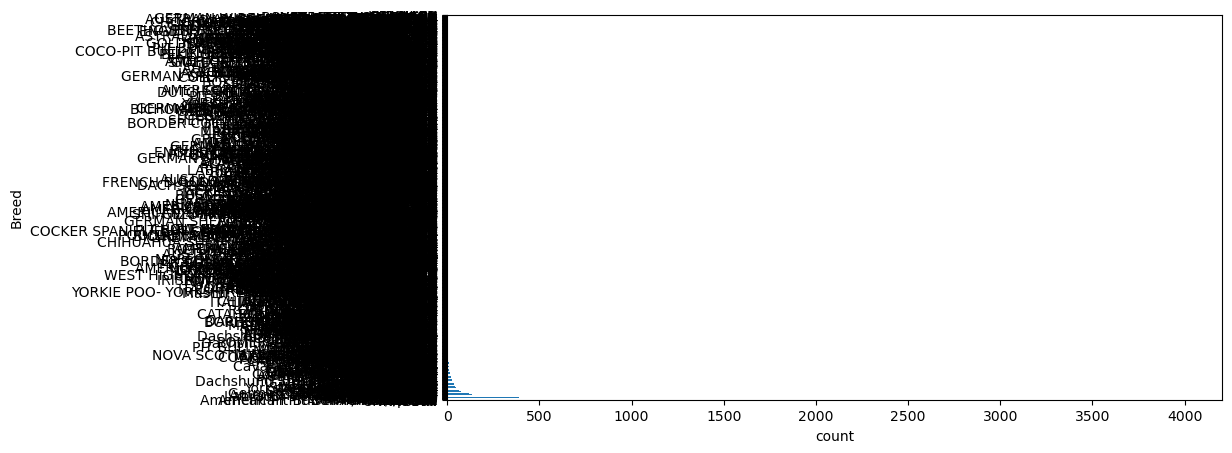

In [399]:
plt.figure(figsize=(10, 5))
dog_bites_df['Breed'].value_counts().plot.barh()
plt.xlabel('count')
plt.ylabel('Breed')
plt.show()

In [400]:
dog_bites_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22663 entries, 0 to 22662
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   UniqueID    22663 non-null  int64         
 1   DateOfBite  22663 non-null  datetime64[ns]
 2   Species     22663 non-null  object        
 3   Breed       20445 non-null  object        
 4   Age         11442 non-null  object        
 5   Gender      22663 non-null  object        
 6   SpayNeuter  22663 non-null  bool          
 7   Borough     22663 non-null  object        
 8   ZipCode     16805 non-null  object        
 9   Season      22663 non-null  object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(7)
memory usage: 1.6+ MB


In [401]:
dog_bites_df.head()

,UniqueID,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode,Season
0,1,2018-01-01,DOG,UNKNOWN,NaN,U,False,Brooklyn,11220,Winter
1,2,2018-01-04,DOG,UNKNOWN,NaN,U,False,Brooklyn,NaN,Winter
2,3,2018-01-06,DOG,Pit Bull,NaN,U,False,Brooklyn,11224,Winter
3,4,2018-01-08,DOG,Mixed/Other,4,M,False,Brooklyn,11231,Winter
4,5,2018-01-09,DOG,Pit Bull,NaN,U,False,Brooklyn,11224,Winter


In [402]:
dog_bites_df = dog_bites_df.drop('DateOfBite', axis=1)

In [403]:
dog_bites_df.head()

,UniqueID,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode,Season
0,1,DOG,UNKNOWN,NaN,U,False,Brooklyn,11220,Winter
1,2,DOG,UNKNOWN,NaN,U,False,Brooklyn,NaN,Winter
2,3,DOG,Pit Bull,NaN,U,False,Brooklyn,11224,Winter
3,4,DOG,Mixed/Other,4,M,False,Brooklyn,11231,Winter
4,5,DOG,Pit Bull,NaN,U,False,Brooklyn,11224,Winter


In [404]:
# Import fuzzywuzzy library
from fuzzywuzzy import process

# Fill NaN values in the 'Breed' column with 'unknown' and convert to lowercase
dog_bites_df['Breed'] = dog_bites_df['Breed'].str.lower().fillna('unknown')

# Retry the process of creating a breed mapping dictionary
dog_bites_breeds = dog_bites_df['Breed'].str.lower().unique()  # Apply strip and lower element-wise
akc_breeds = akc_df['Unnamed: 0'].str.lower().unique()

# Function to perform fuzzy matching
def get_closest_match(breed, akc_breeds):
    match, score = process.extractOne(breed, akc_breeds)
    return match if score > 80 else None  # If the similarity score is high, return the AKC breed; otherwise return None

# Refined function to handle breed names and attempt fuzzy/substring matching
def match_breed(breed, akc_breeds):
    # Step 1: Apply fuzzy matching for entire breed name
    closest_match = get_closest_match(breed, akc_breeds)
    if closest_match:
        return closest_match
    
    # Step 2: Try substring matching
    for akc_breed in akc_breeds:
        if breed in akc_breed or akc_breed in breed:
            return akc_breed
    
    # Step 3: If no match is found, return None
    return None

# Create a mapping dictionary to standardize dog breeds based on the AKC breed list using fuzzy matching and substring matching
breed_mapping_dict = {}

# Go through all breeds in Dog Bites dataset
for breed in dog_bites_breeds:
    # Handle 'Mixed' and 'Crossbreed' cases
    if 'mix' in breed or 'crossbreed' in breed:
        breed_mapping_dict[breed] = 'mixed'
    
    # Try to match breed via fuzzy and substring matching
    else:
        matched_breed = match_breed(breed, akc_breeds)
        
        if matched_breed:  # If a match is found (fuzzy or substring)
            breed_mapping_dict[breed] = matched_breed
        else:
            # If no match is found, categorize as 'unknown'
            breed_mapping_dict[breed] = 'unknown'

# Step 1: Create a new column 'original_breed' to preserve the original breed names
dog_bites_df['original_breed'] = dog_bites_df['Breed']

# Step 2: Apply the breed_mapping_dict to clean the 'Breed' column (which will now be the standardized breed)
dog_bites_df['Breed'] = dog_bites_df['original_breed'].map(breed_mapping_dict)

# Replace any NaN values that resulted from mapping with 'unknown'
dog_bites_df['Breed'] = dog_bites_df['Breed'].fillna('unknown')

# Display the cleaned dataframe with both original and standardized breed columns
dog_bites_df.head()


,UniqueID,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode,Season,original_breed
0,1,DOG,unknown,NaN,U,False,Brooklyn,11220,Winter,unknown
1,2,DOG,unknown,NaN,U,False,Brooklyn,NaN,Winter,unknown
2,3,DOG,bull terrier,NaN,U,False,Brooklyn,11224,Winter,pit bull
3,4,DOG,mixed,4,M,False,Brooklyn,11231,Winter,mixed/other
4,5,DOG,bull terrier,NaN,U,False,Brooklyn,11224,Winter,pit bull


In [405]:
akc_df.head()

,Unnamed: 0,description,temperament,popularity,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,...,grooming_frequency_value,grooming_frequency_category,shedding_value,shedding_category,energy_level_value,energy_level_category,trainability_value,trainability_category,demeanor_value,demeanor_category
0,Affenpinscher,The Affen’s apish look has been described many...,"Confident, Famously Funny, Fearless",148,22.86,29.21,3.175147,4.535924,12.0,15.0,...,0.6,2-3 Times a Week Brushing,0.6,Seasonal,0.6,Regular Exercise,0.8,Easy Training,1.0,Outgoing
1,Afghan Hound,"The Afghan Hound is an ancient breed, his whol...","Dignified, Profoundly Loyal, Aristocratic",113,63.50,68.58,22.679619,27.215542,12.0,15.0,...,0.8,Daily Brushing,0.2,Infrequent,0.8,Energetic,0.2,May be Stubborn,0.2,Aloof/Wary
2,Airedale Terrier,The Airedale Terrier is the largest of all ter...,"Friendly, Clever, Courageous",60,58.42,58.42,22.679619,31.751466,11.0,14.0,...,0.6,2-3 Times a Week Brushing,0.4,Occasional,0.6,Regular Exercise,1.0,Eager to Please,0.8,Friendly
3,Akita,"Akitas are burly, heavy-boned spitz-type dogs ...","Courageous, Dignified, Profoundly Loyal",47,60.96,71.12,31.751466,58.967008,10.0,13.0,...,0.8,Daily Brushing,0.6,Seasonal,0.8,Energetic,1.0,Eager to Please,0.6,Alert/Responsive
4,Alaskan Malamute,The Alaskan Malamute stands 23 to 25 inches at...,"Affectionate, Loyal, Playful",58,58.42,63.50,34.019428,38.555351,10.0,14.0,...,0.6,2-3 Times a Week Brushing,0.6,Seasonal,0.8,Energetic,0.4,Independent,0.8,Friendly


In [406]:
akc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   277 non-null    object 
 1   description                  277 non-null    object 
 2   temperament                  276 non-null    object 
 3   popularity                   198 non-null    object 
 4   min_height                   277 non-null    float64
 5   max_height                   277 non-null    float64
 6   min_weight                   275 non-null    float64
 7   max_weight                   275 non-null    float64
 8   min_expectancy               274 non-null    float64
 9   max_expectancy               274 non-null    float64
 10  group                        277 non-null    object 
 11  grooming_frequency_value     270 non-null    float64
 12  grooming_frequency_category  270 non-null    object 
 13  shedding_value      

In [407]:
# Rename 'Unnamed: 0' in akc_df to 'Breed' to match the column in dog_bites_df
akc_df.rename(columns={'Unnamed: 0': 'Breed'}, inplace=True)

# Convert 'Breed' column in akc_df to lowercase
akc_df['Breed'] = akc_df['Breed'].str.lower()

# Create dictionaries from akc_df to map Breed to trainability_value and group
trainability_dict = akc_df.set_index('Breed')['trainability_value'].to_dict()
group_dict = akc_df.set_index('Breed')['group'].to_dict()

# Define a function to set 'mixed' and 'unknown' to NaN, and map other breeds using the dictionaries
def get_trainability_and_group(breed):
    if breed in ['mixed', 'unknown']:
        return np.nan, np.nan  # Return NaN for both trainability and group
    else:
        # Use the dictionaries to get trainability_value and group, or return NaN if the breed is not found
        trainability_value = trainability_dict.get(breed, np.nan)
        group = group_dict.get(breed, np.nan)
        return trainability_value, group

# Apply the function to populate both 'trainability_value' and 'group' columns in dog_bites_df
dog_bites_df[['trainability_value', 'group']] = dog_bites_df['Breed'].apply(
    lambda breed: pd.Series(get_trainability_and_group(breed))
)

In [443]:
# Function to adjust trainability_value randomly within -0.2 to 0.2, ensuring the result stays between 0 and 1 and is rounded to two decimal places
def adjust_trainability(value):
    if pd.isna(value):
        return np.nan  # If the value is NaN, return NaN
    adjustment = np.random.uniform(-0.2, 0.2)  # Random adjustment between -0.2 and 0.2
    new_value = value + adjustment
    new_value = np.clip(new_value, 0, 1)  # Ensures value stays between 0 and 1
    return round(new_value, 2)  # Round to two decimal places

In [444]:
# Apply the function to adjust 'trainability_value' for each row
dog_bites_df['trainability_value'] = dog_bites_df['trainability_value'].apply(adjust_trainability)

In [445]:
dog_bites_df

,UniqueID,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode,Season,original_breed,trainability_value,group
0,1,DOG,unknown,NaN,U,False,Brooklyn,11220,Winter,unknown,NaN,NaN
1,2,DOG,unknown,NaN,U,False,Brooklyn,NaN,Winter,unknown,NaN,NaN
2,3,DOG,bull terrier,NaN,U,False,Brooklyn,11224,Winter,pit bull,0.37,Terrier Group
3,4,DOG,mixed,4.0,M,False,Brooklyn,11231,Winter,mixed/other,NaN,NaN
4,5,DOG,bull terrier,NaN,U,False,Brooklyn,11224,Winter,pit bull,0.43,Terrier Group
...,...,...,...,...,...,...,...,...,...,...,...,...
22658,10276,DOG,mixed,7.0,M,True,Staten Island,10303,Winter,chiweenie mix,NaN,NaN
22659,10277,DOG,unknown,5.0,F,True,Staten Island,10303,Winter,dunker,NaN,NaN
22660,10278,DOG,miniature schnauzer,NaN,M,True,Staten Island,10312,Winter,"schnauzer, miniature",0.64,Terrier Group
22661,10279,DOG,mixed,NaN,F,False,Staten Island,10308,Winter,mixed/other,NaN,NaN


In [446]:
dog_bites_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22663 entries, 0 to 22662
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   UniqueID            22663 non-null  int64  
 1   Species             22663 non-null  object 
 2   Breed               22663 non-null  object 
 3   Age                 10230 non-null  float64
 4   Gender              22663 non-null  object 
 5   SpayNeuter          22663 non-null  bool   
 6   Borough             22663 non-null  object 
 7   ZipCode             16805 non-null  object 
 8   Season              22663 non-null  object 
 9   original_breed      22663 non-null  object 
 10  trainability_value  13298 non-null  float64
 11  group               13475 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(8)
memory usage: 1.9+ MB


In [447]:
df = dog_bites_df.dropna(subset=['trainability_value'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13298 entries, 2 to 22662
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   UniqueID            13298 non-null  int64  
 1   Species             13298 non-null  object 
 2   Breed               13298 non-null  object 
 3   Age                 6446 non-null   float64
 4   Gender              13298 non-null  object 
 5   SpayNeuter          13298 non-null  bool   
 6   Borough             13298 non-null  object 
 7   ZipCode             10354 non-null  object 
 8   Season              13298 non-null  object 
 9   original_breed      13298 non-null  object 
 10  trainability_value  13298 non-null  float64
 11  group               13298 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(8)
memory usage: 1.2+ MB


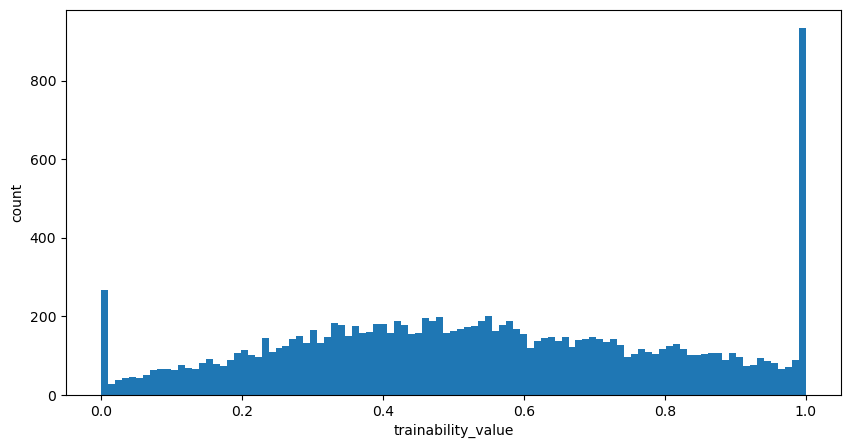

In [448]:
plt.figure(figsize=(10, 5))

df['trainability_value'].plot.hist(bins = df['trainability_value'].nunique())   # bins = int(np.sqrt(df.shape[0])) 
                        # bins = df['age'].nunique()
plt.xlabel('trainability_value')
plt.ylabel('count')
plt.show()

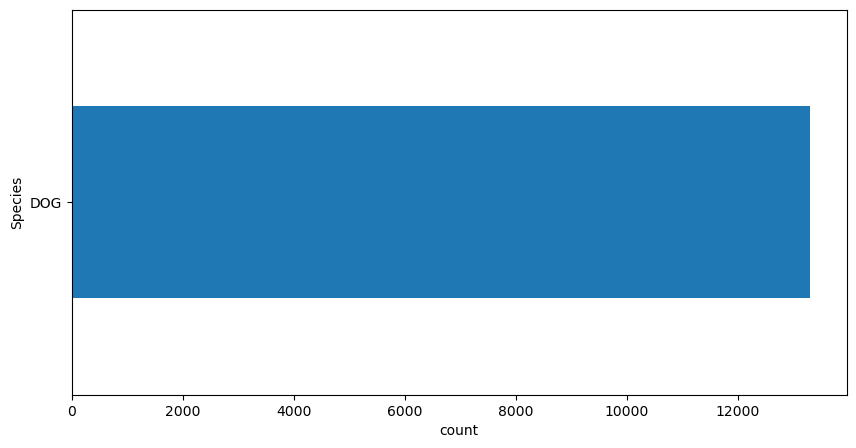

In [449]:
plt.figure(figsize=(10, 5))
df['Species'].value_counts().plot.barh()
plt.xlabel('count')
plt.ylabel('Species')
plt.show()

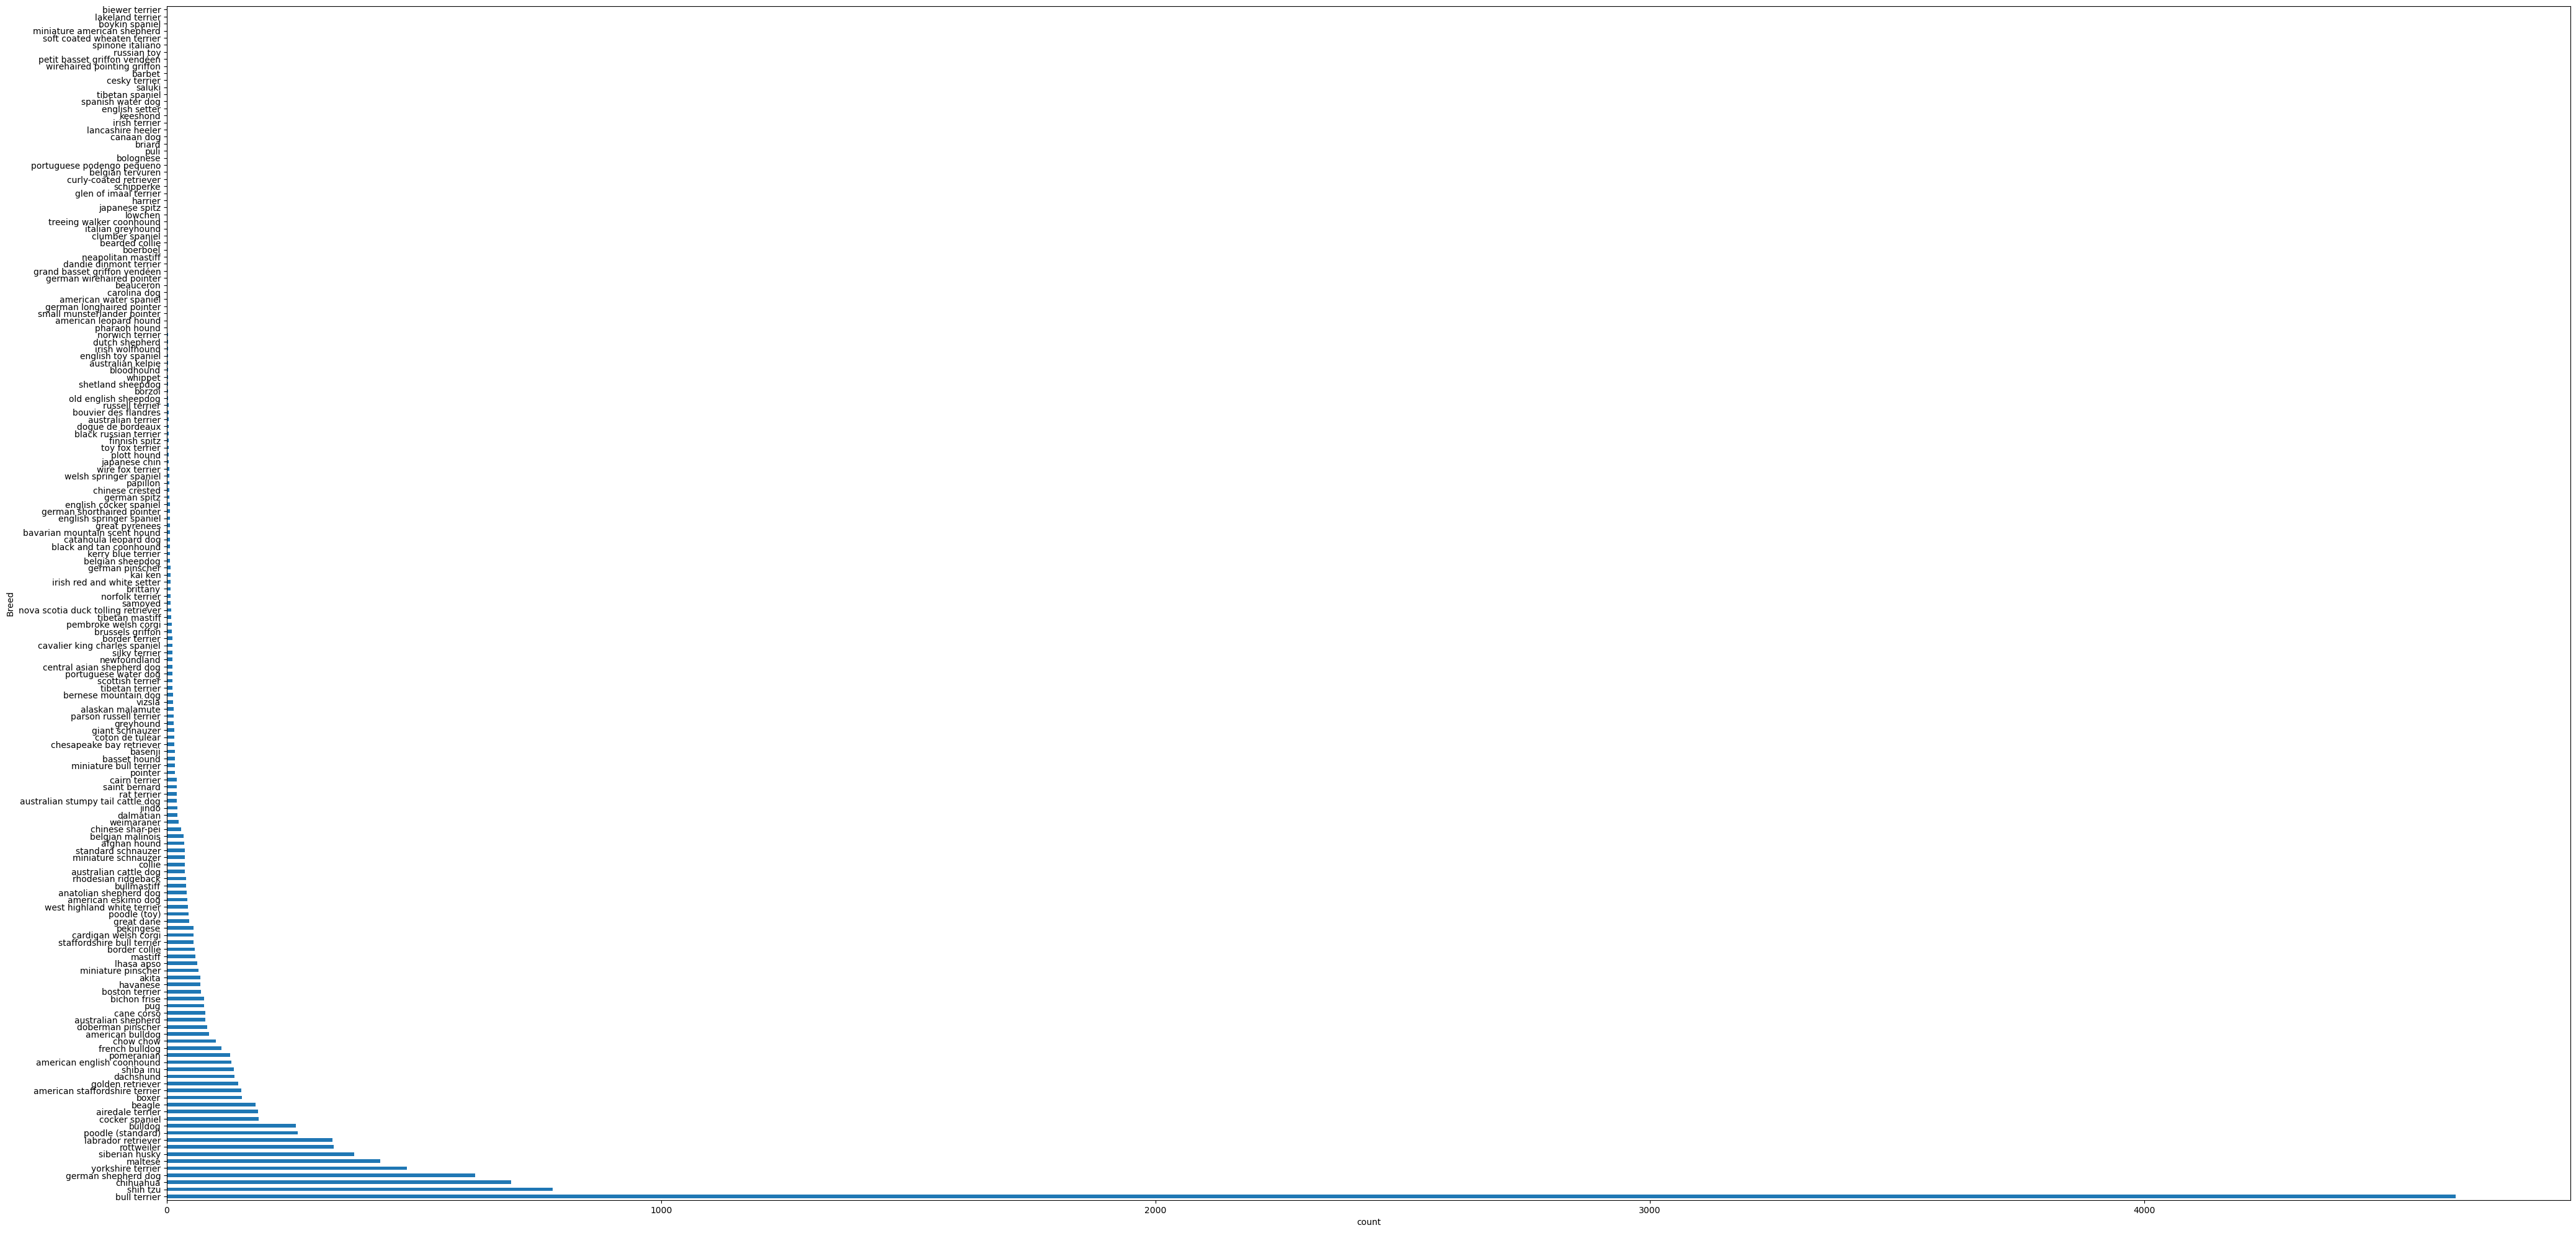

In [450]:
plt.figure(figsize=(50, 25))
df['Breed'].value_counts().plot.barh()
plt.xlabel('count')
plt.ylabel('Breed')
plt.show()

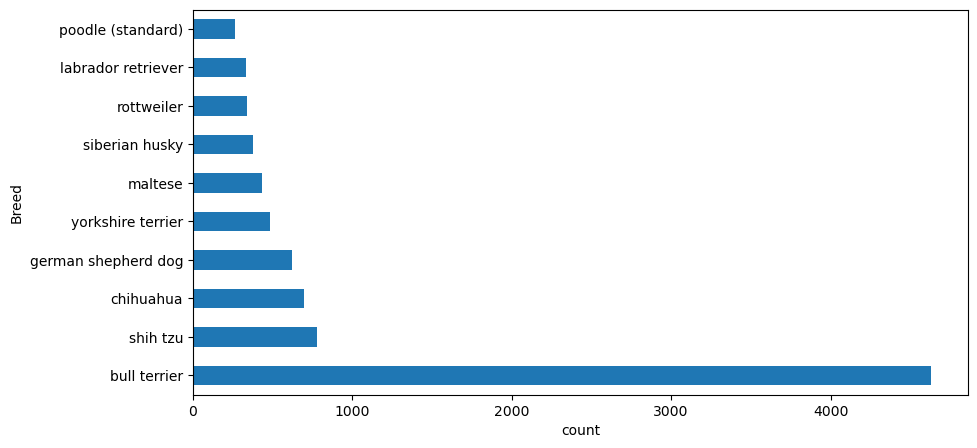

In [451]:
plt.figure(figsize=(10, 5))
df['Breed'].value_counts().head(10).plot.barh()
plt.xlabel('count')
plt.ylabel('Breed')
plt.show()

/var/folders/pw/j1b5757d4hg8vhmyx5h9rmjh0000gn/T/ipykernel_3826/3712711959.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AgeGroup'] = pd.cut(dog_bites_df['Age'], bins=bins, labels=labels, right=False)


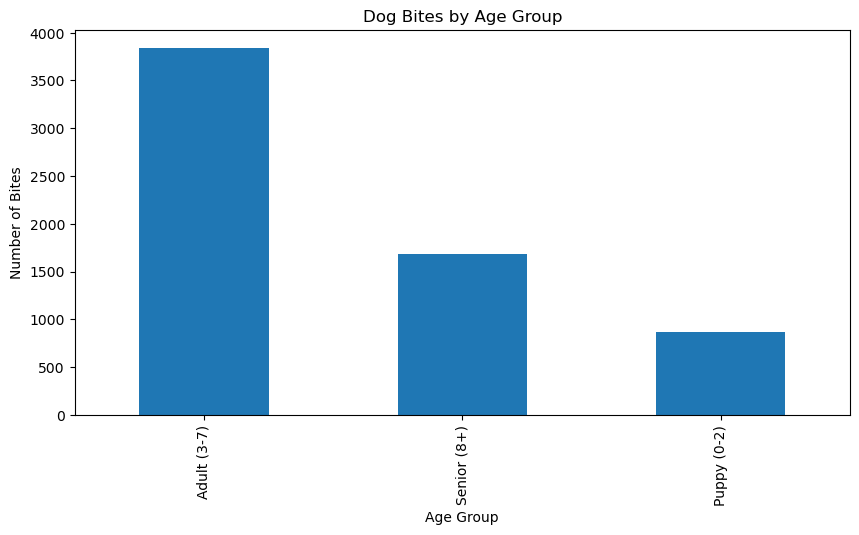

In [452]:
dog_bites_df['Age'] = pd.to_numeric(dog_bites_df['Age'], errors='coerce')

# Define age groups
bins = [0, 2, 7, 15]  # Puppy: 0-2 years, Adult: 3-7 years, Senior: 8+ years
labels = ['Puppy (0-2)', 'Adult (3-7)', 'Senior (8+)']

# Create a new 'AgeGroup' column
df['AgeGroup'] = pd.cut(dog_bites_df['Age'], bins=bins, labels=labels, right=False)

# Count dog bites by age group
age_group_counts = df['AgeGroup'].value_counts()

# Bar plot for age groups
plt.figure(figsize=(10, 5))
age_group_counts.plot(kind='bar')
plt.title('Dog Bites by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Bites')
plt.show()

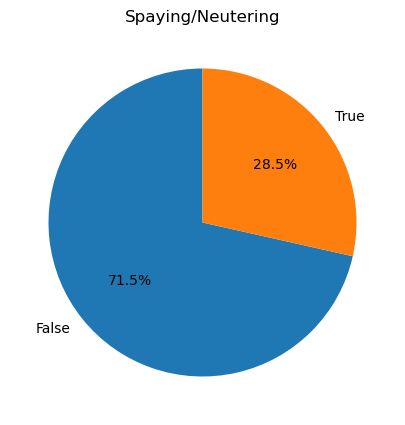

In [453]:
# Count the number of spayed/neutered vs non-spayed/neutered
spay_neuter_counts = df['SpayNeuter'].value_counts()

# Pie chart for spay/neuter
plt.figure(figsize=(10, 5))
spay_neuter_counts.plot(kind='pie', startangle=90, autopct='%1.1f%%')
plt.title('Spaying/Neutering')
plt.ylabel('')  # Remove y-label
plt.show()

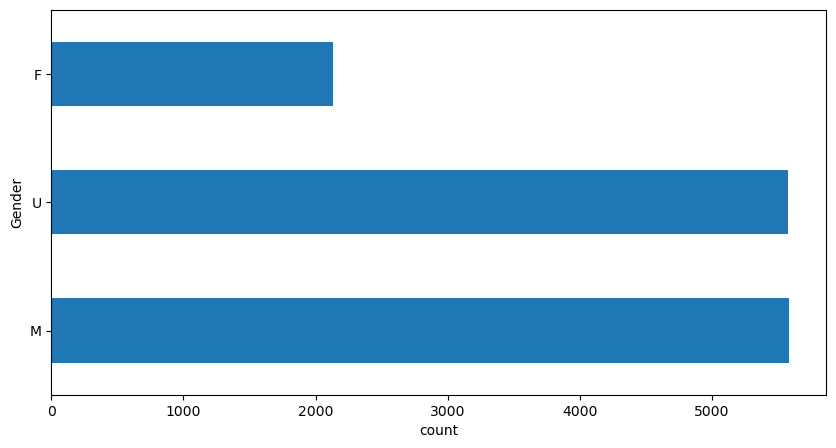

In [454]:
plt.figure(figsize=(10, 5))
df['Gender'].value_counts().head(10).plot.barh()
plt.xlabel('count')
plt.ylabel('Gender')
plt.show()

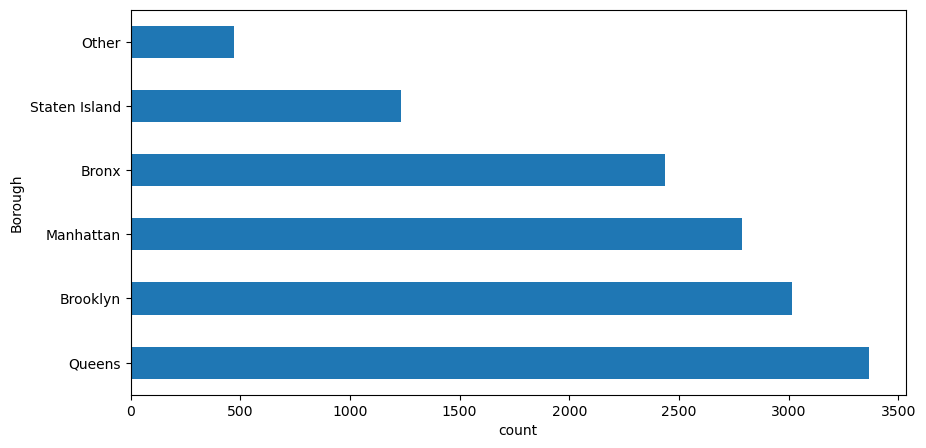

In [455]:
plt.figure(figsize=(10, 5))
df['Borough'].value_counts().head(10).plot.barh()
plt.xlabel('count')
plt.ylabel('Borough')
plt.show()

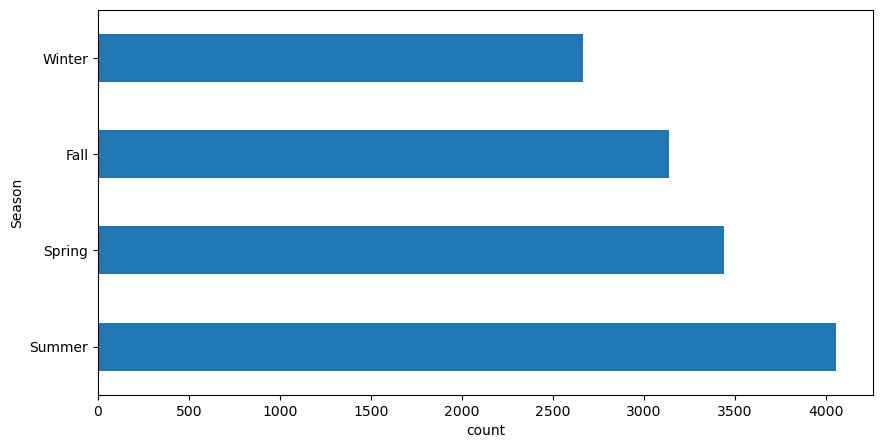

In [456]:
plt.figure(figsize=(10, 5))
df['Season'].value_counts().plot.barh()
plt.xlabel('count')
plt.ylabel('Season')
plt.show()

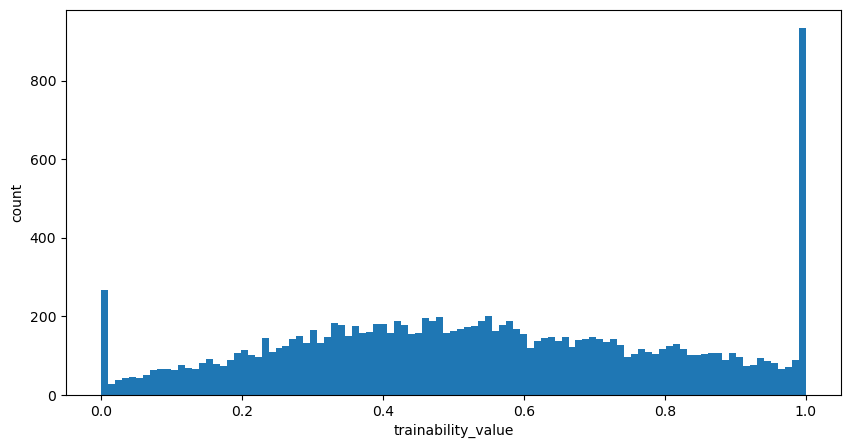

In [457]:
plt.figure(figsize=(10, 5))

df['trainability_value'].plot.hist(bins = df['trainability_value'].nunique())   # bins = int(np.sqrt(df.shape[0])) 
                        # bins = df['age'].nunique()
plt.xlabel('trainability_value')
plt.ylabel('count')
plt.show()

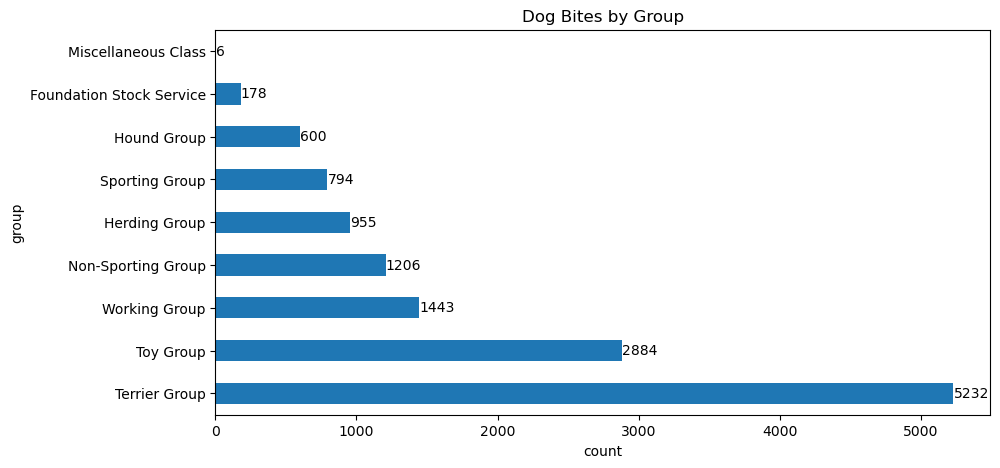

In [458]:
# Plot the bar chart
plt.figure(figsize=(10, 5))
ax = df['group'].value_counts().plot.barh()

# Add labels to each bar
for i in ax.containers:
    ax.bar_label(i, fmt='%d')  # '%d' for integer format

plt.xlabel('count')
plt.ylabel('group')
plt.title('Dog Bites by Group')
plt.show()

In [459]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13298 entries, 2 to 22662
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   UniqueID            13298 non-null  int64   
 1   Species             13298 non-null  object  
 2   Breed               13298 non-null  object  
 3   Age                 6446 non-null   float64 
 4   Gender              13298 non-null  object  
 5   SpayNeuter          13298 non-null  bool    
 6   Borough             13298 non-null  object  
 7   ZipCode             10354 non-null  object  
 8   Season              13298 non-null  object  
 9   original_breed      13298 non-null  object  
 10  trainability_value  13298 non-null  float64 
 11  group               13298 non-null  object  
 12  AgeGroup            6389 non-null   category
dtypes: bool(1), category(1), float64(2), int64(1), object(8)
memory usage: 1.2+ MB


In [460]:
df = df.drop(columns=['UniqueID'])
df = df.drop(columns=['Species'])
df = df.drop(columns=['Age'])
df = df.drop(columns=['original_breed'])
df = df.drop(columns=['ZipCode'])

In [461]:
df.info()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 13298 entries, 2 to 22662
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Breed               13298 non-null  object  
 1   Gender              13298 non-null  object  
 2   SpayNeuter          13298 non-null  bool    
 3   Borough             13298 non-null  object  
 4   Season              13298 non-null  object  
 5   trainability_value  13298 non-null  float64 
 6   group               13298 non-null  object  
 7   AgeGroup            6389 non-null   category
dtypes: bool(1), category(1), float64(1), object(5)
memory usage: 753.3+ KB
           Breed Gender  SpayNeuter   Borough  Season  trainability_value  \
2   bull terrier      U       False  Brooklyn  Winter                0.37   
4   bull terrier      U       False  Brooklyn  Winter                0.43   
5        basenji      M       False  Brooklyn  Winter                0.50   
7   bull terr

In [462]:
from sklearn.model_selection import train_test_split

y = df['trainability_value'] # remember, we want to predict who earns more than 50k or less than 50k
X = df.loc[:, df.columns != 'trainability_value'] # all other columns are features

print(y)
print(X.head())

2        0.37
4        0.43
5        0.50
7        0.49
12       0.59
         ... 
22654    0.19
22656    0.73
22657    0.22
22660    0.64
22662    0.86
Name: trainability_value, Length: 13298, dtype: float64
           Breed Gender  SpayNeuter   Borough  Season          group  \
2   bull terrier      U       False  Brooklyn  Winter  Terrier Group   
4   bull terrier      U       False  Brooklyn  Winter  Terrier Group   
5        basenji      M       False  Brooklyn  Winter    Hound Group   
7   bull terrier      U       False  Brooklyn  Winter  Terrier Group   
12    great dane      F        True  Brooklyn  Winter  Working Group   

       AgeGroup  
2           NaN  
4           NaN  
5           NaN  
7           NaN  
12  Adult (3-7)  


In [463]:
ftrs = df.columns

In [464]:
random_state = 42

# let's split to train, CV, and test
X_train, X_other, y_train, y_other = train_test_split(df, y, train_size=0.6, random_state=random_state)
X_CV, X_test, y_CV, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=random_state)

print(X_train.shape)
print(X_CV.shape)
print(X_test.shape)

(7978, 8)
(2660, 8)
(2660, 8)


In [465]:
# collect the various features
cat_ftrs = ['Breed','Gender','Borough','Season','group']
ordinal_ftrs = ['AgeGroup']
ordinal_cats = [['Puppy (0-2)', 'Adult (3-7)', 'Senior (8+)', 'NA']]
num_ftrs = ['trainability_value', 'SpayNeuter']

In [466]:
# preprocess with pipeline and columntransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

random_state = 42

# one-hot encoder
# We need to replace the NaN with a string first!
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value='missing')),
    ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))])

# ordinal encoder
# We need to replace the NaN with a string first!
ordinal_transformer = Pipeline(steps=[
    ('imputer2', SimpleImputer(strategy='constant',fill_value='NA')),
    ('ordinal', OrdinalEncoder(categories = ordinal_cats))])

# standard scaler
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# collect the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_ftrs),
        ('cat', categorical_transformer, cat_ftrs),
        ('ord', ordinal_transformer, ordinal_ftrs)])

In [467]:
# fit_transform the training set
X_prep = preprocessor.fit_transform(X_train)
# the feature names after fit
feature_names = preprocessor.get_feature_names_out()

# you can convert the numpy array back to a data frame with the feature names if you want
df_train = pd.DataFrame(data=X_prep,columns=feature_names)
print(df_train.shape)

# transform the CV
df_CV = preprocessor.transform(X_CV)
df_CV = pd.DataFrame(data=df_CV,columns = feature_names)
print(df_CV.shape)

# transform the test
df_test = preprocessor.transform(X_test)
df_test = pd.DataFrame(data=df_test,columns = feature_names)
print(df_test.shape)
print(feature_names)

(7978, 182)
(2660, 182)
(2660, 182)
['num__trainability_value' 'num__SpayNeuter' 'cat__Breed_afghan hound'
 'cat__Breed_airedale terrier' 'cat__Breed_akita'
 'cat__Breed_alaskan malamute' 'cat__Breed_american bulldog'
 'cat__Breed_american english coonhound' 'cat__Breed_american eskimo dog'
 'cat__Breed_american leopard hound'
 'cat__Breed_american staffordshire terrier'
 'cat__Breed_american water spaniel' 'cat__Breed_anatolian shepherd dog'
 'cat__Breed_australian cattle dog' 'cat__Breed_australian kelpie'
 'cat__Breed_australian shepherd'
 'cat__Breed_australian stumpy tail cattle dog'
 'cat__Breed_australian terrier' 'cat__Breed_barbet' 'cat__Breed_basenji'
 'cat__Breed_basset hound' 'cat__Breed_bavarian mountain scent hound'
 'cat__Breed_beagle' 'cat__Breed_bearded collie'
 'cat__Breed_belgian malinois' 'cat__Breed_belgian sheepdog'
 'cat__Breed_belgian tervuren' 'cat__Breed_bernese mountain dog'
 'cat__Breed_bichon frise' 'cat__Breed_biewer terrier'
 'cat__Breed_black and tan coo

In [468]:
corr_matrix = df_train.corr()

print(corr_matrix)

                             num__trainability_value  num__SpayNeuter  \
num__trainability_value                     1.000000         0.094169   
num__SpayNeuter                             0.094169         1.000000   
cat__Breed_afghan hound                    -0.064504         0.036117   
cat__Breed_airedale terrier                 0.148282        -0.007190   
cat__Breed_akita                            0.088249         0.019244   
...                                              ...              ...   
cat__group_Sporting Group                   0.304821         0.061355   
cat__group_Terrier Group                   -0.331223        -0.178739   
cat__group_Toy Group                       -0.088362         0.057986   
cat__group_Working Group                    0.061146        -0.020815   
ord__AgeGroup                              -0.044329        -0.417783   

                             cat__Breed_afghan hound  \
num__trainability_value                    -0.064504   
num__SpayNe

In [469]:
# Get the absolute correlations, unstack the matrix, and sort
abs_corr = corr_matrix.abs().unstack()
sorted_corr = abs_corr.sort_values(ascending=False)

# Filter to show only the top N correlations (and avoid self-correlations)
top_corr = sorted_corr[(sorted_corr != 1)].head(20)

print(top_corr)

cat__Breed_bull terrier              cat__group_Terrier Group               0.907138
cat__group_Terrier Group             cat__Breed_bull terrier                0.907138
cat__group_Herding Group             cat__Breed_german shepherd dog         0.799726
cat__Breed_german shepherd dog       cat__group_Herding Group               0.799726
cat__Gender_M                        cat__Gender_U                          0.722920
cat__Gender_U                        cat__Gender_M                          0.722920
ord__AgeGroup                        cat__Gender_U                          0.713644
cat__Gender_U                        ord__AgeGroup                          0.713644
cat__group_Foundation Stock Service  cat__Breed_american bulldog            0.689469
cat__Breed_american bulldog          cat__group_Foundation Stock Service    0.689469
cat__Breed_dutch shepherd            cat__group_Miscellaneous Class         0.632337
cat__group_Miscellaneous Class       cat__Breed_dutch shepherd   

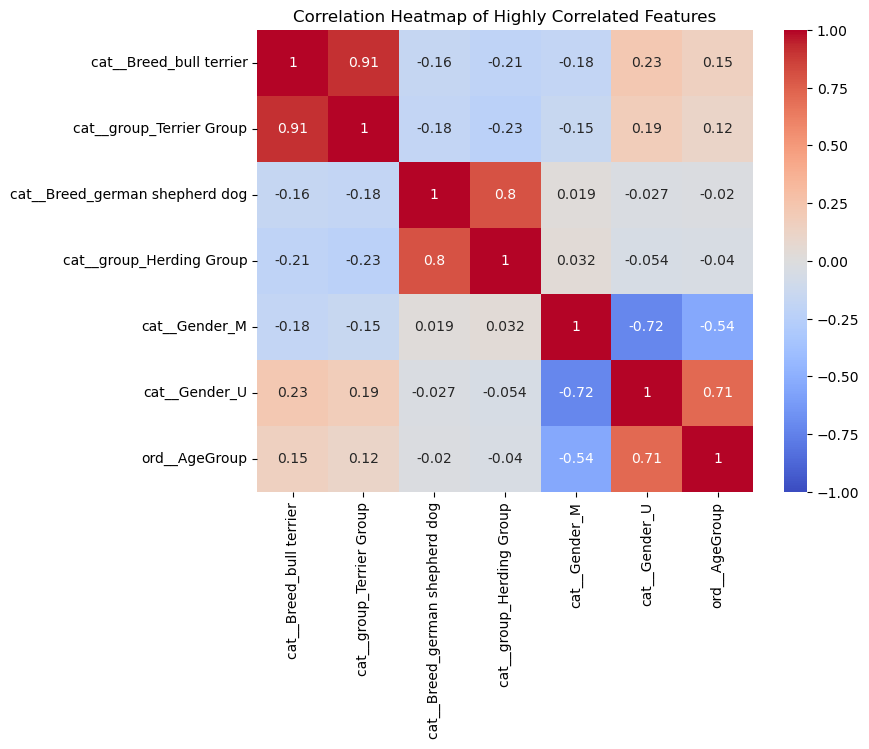

In [470]:
high_corr_features = [
    'cat__Breed_bull terrier', 
    'cat__group_Terrier Group', 
    'cat__Breed_german shepherd dog', 
    'cat__group_Herding Group', 
    'cat__Gender_M', 
    'cat__Gender_U', 
    'ord__AgeGroup'
]

high_corr_df = df_train[high_corr_features]

high_corr_matrix = high_corr_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(high_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True)
plt.title('Correlation Heatmap of Highly Correlated Features')
plt.show()